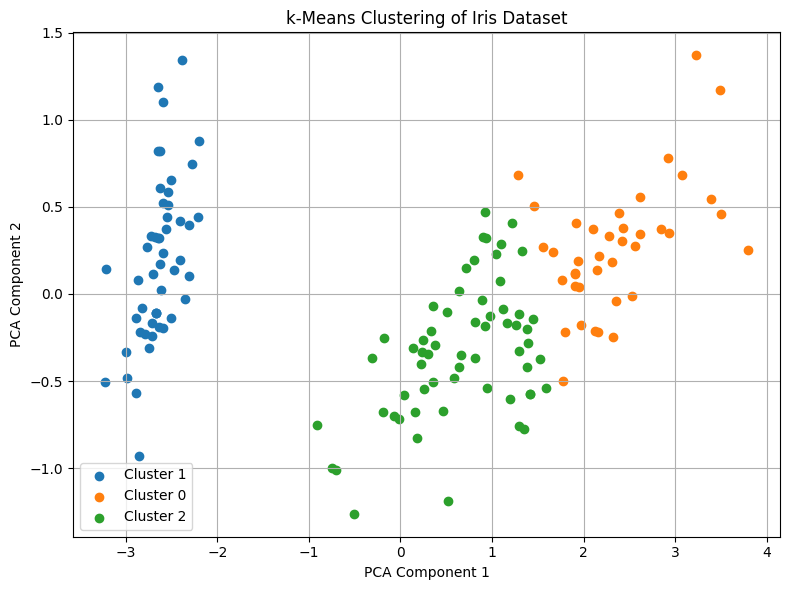

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/Iris.csv")

# Drop the 'Id' column if it exists
if 'Id' in df.columns:
    df.drop('Id', axis=1, inplace=True)

# Extract features (excluding the target variable if it exists)
features = df.drop('Species', axis=1)

# Apply k-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(features)

# Add cluster labels to the dataframe
df['Cluster'] = clusters

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features)
df['PCA1'] = reduced_features[:, 0]
df['PCA2'] = reduced_features[:, 1]

# Plot the clusters
plt.figure(figsize=(8, 6))
for cluster in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}')
plt.title('k-Means Clustering of Iris Dataset')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


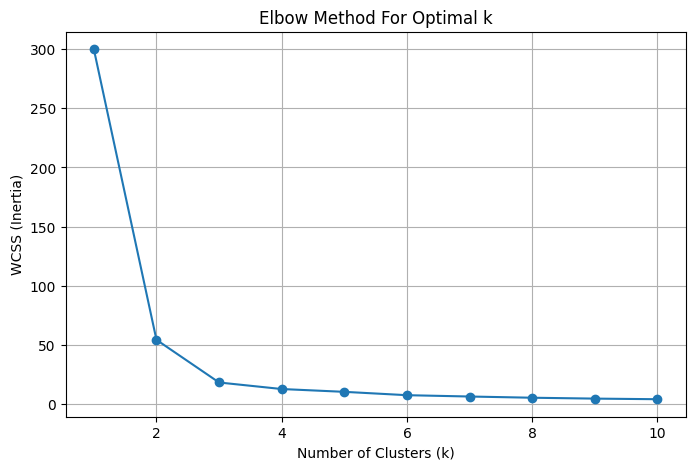

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Load Dataset
df = pd.read_csv('/content/iris (3).csv')

# Step 2: Use only petal length and petal width
X = df[['petal_length', 'petal_width']]

# Step 3: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Elbow method to find optimal k
wcss = []  # Within-cluster sum of squares

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Step 5: Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()


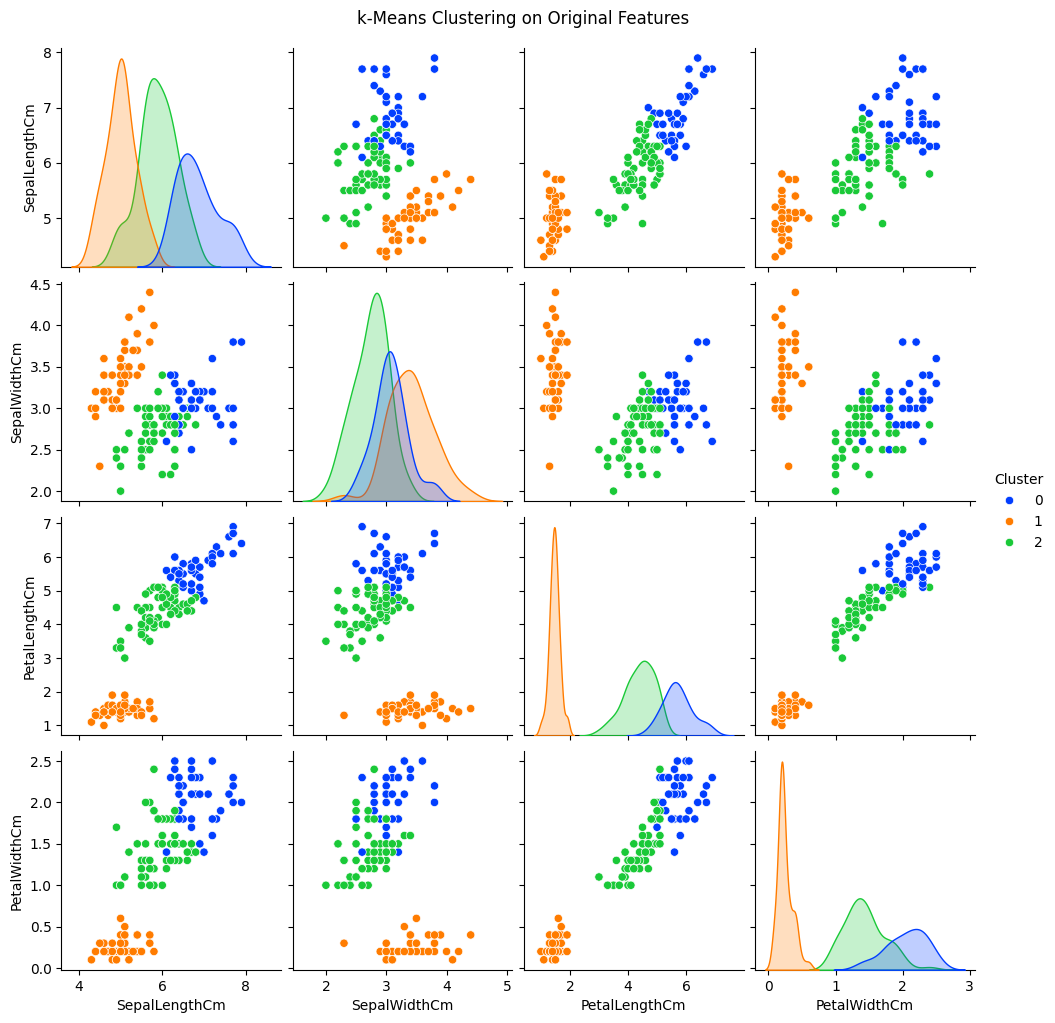

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/Iris.csv")

# Drop the 'Id' column if it exists
if 'Id' in df.columns:
    df.drop('Id', axis=1, inplace=True)

# Extract features (excluding target variable)
features = df.drop('Species', axis=1)

# Apply k-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(features)

# Pairplot to visualize clusters in 2D feature combinations
sns.pairplot(df, hue='Cluster', vars=features.columns, palette='bright')
plt.suptitle('k-Means Clustering on Original Features', y=1.02)
plt.show()
